<a href="https://colab.research.google.com/github/Sambu-Armstrong/Webrep1/blob/main/Mall_Customer_Segmentation_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation Using K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('Mall_Customers.csv')
df.head()


Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

df = df.drop_duplicates()

df_cleaned = df.drop('CustomerID', axis=1)
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
0


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


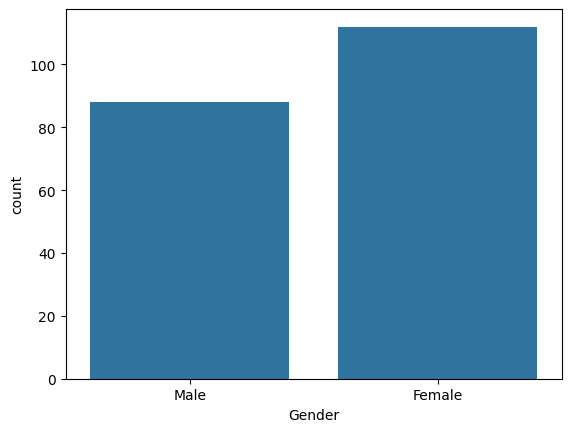

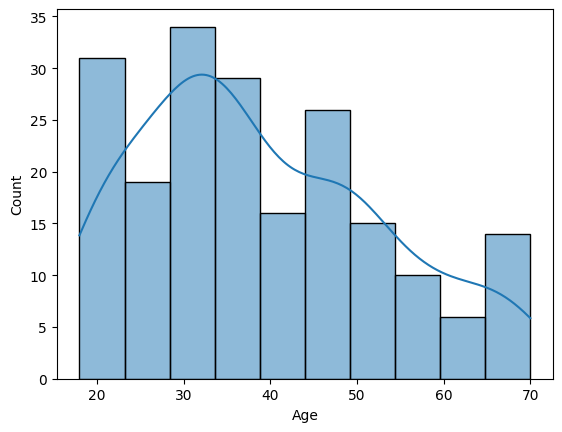

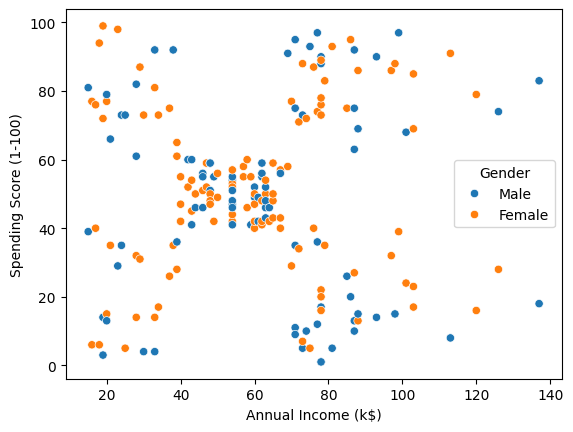

In [6]:
# Basic statistics
df_cleaned.describe()

# Visualizations
# 1. Gender distribution
sns.countplot(x='Gender', data=df_cleaned)
plt.show()

# 2. Age distribution
sns.histplot(df_cleaned['Age'], bins=10, kde=True)
plt.show()

# 3. Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df_cleaned)
plt.show()



#Observations/Insights
- 1. Most customers fall in the 25-40 age range.
- 2. There is almost equal distribution of male and female customers.
- 3. Spending Score varies independently of Annual Income.

3.a) K-means clustering (1 feature)

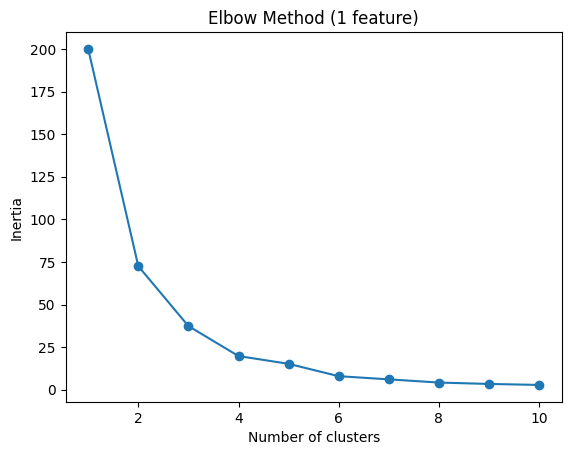

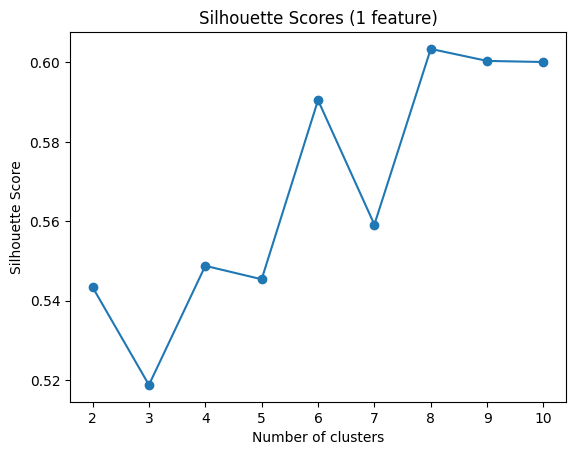

In [7]:
X1 = df_cleaned[['Annual Income (k$)']]

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method (1 feature)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Scores
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1_scaled)
    sil_scores.append(silhouette_score(X1_scaled, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores (1 feature)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

kmeans1 = KMeans(n_clusters=5, random_state=42)
df_cleaned['Cluster_1'] = kmeans1.fit_predict(X1_scaled)


3.b) K-means clustering (2 Features)

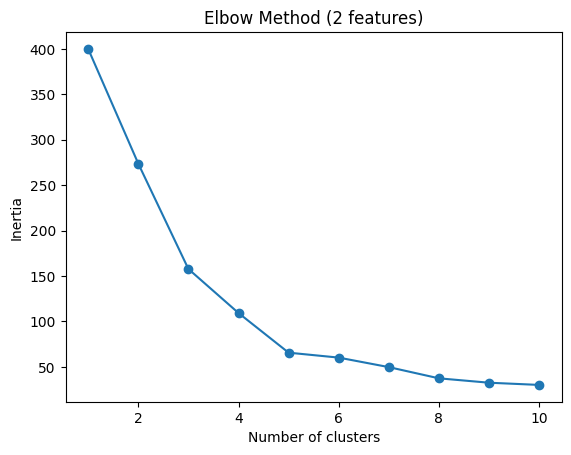

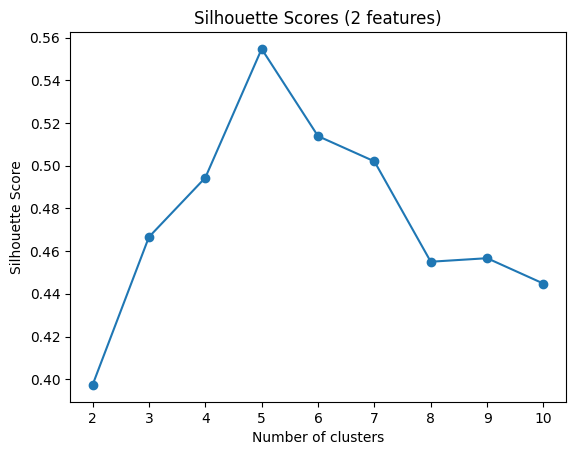

In [ ]:
X2 = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

X2_scaled = scaler.fit_transform(X2)

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method (2 features)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Scores
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X2_scaled)
    sil_scores.append(silhouette_score(X2_scaled, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores (2 features)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

kmeans2 = KMeans(n_clusters=5, random_state=42)
df_cleaned['Cluster_2'] = kmeans2.fit_predict(X2_scaled)


# 4. Visualizing and Comparing Clusters

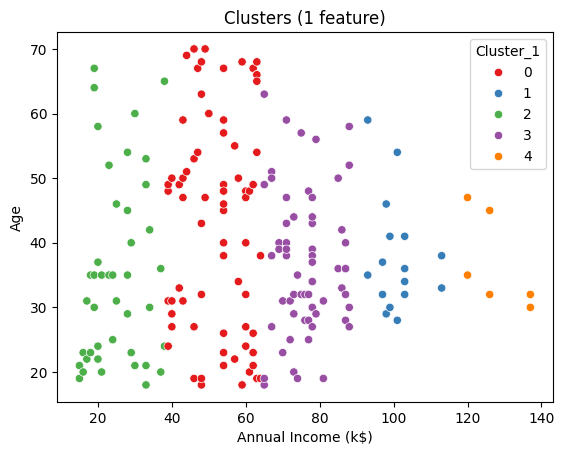

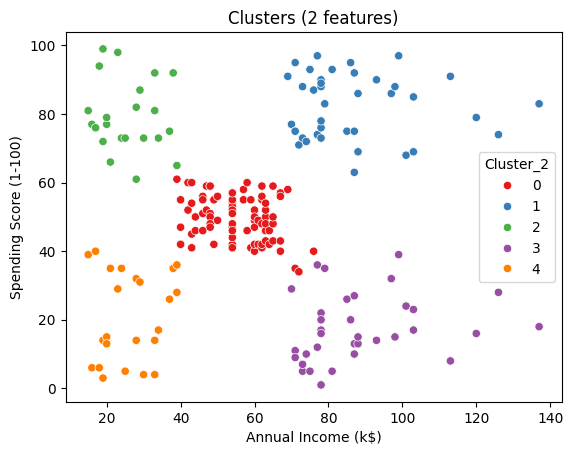

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Age', hue='Cluster_1', palette='Set1', data=df_cleaned)
plt.title('Clusters (1 feature)')
plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_2', palette='Set1', data=df_cleaned)
plt.title('Clusters (2 features)')
plt.show()


# Comments on distribution of clusters:
Clusters based on 2 features are more meaningful for segmentation as they combine income and spending behavior.
1-feature clustering may group customers only by income, ignoring spending habits.

# 5. Using 2-feature clustering for customer engagement

Example suggestions for mall management:
- High Income + High Spending: Offer loyalty programs, VIP events, exclusive deals.
- Low Income + High Spending: Target with personalized discounts and promotions to maintain engagement.
- High Income + Low Spending: Use marketing campaigns to promote premium products and cross-selling opportunities.
- Low Income + Low Spending: Focus on budget-friendly offers, special promotions, and community events.
- Medium clusters: Mix of strategies depending on observed spending patterns.

This approach ensures that marketing is personalized, increasing customer satisfaction and revenue.


**Proof of groupwork**
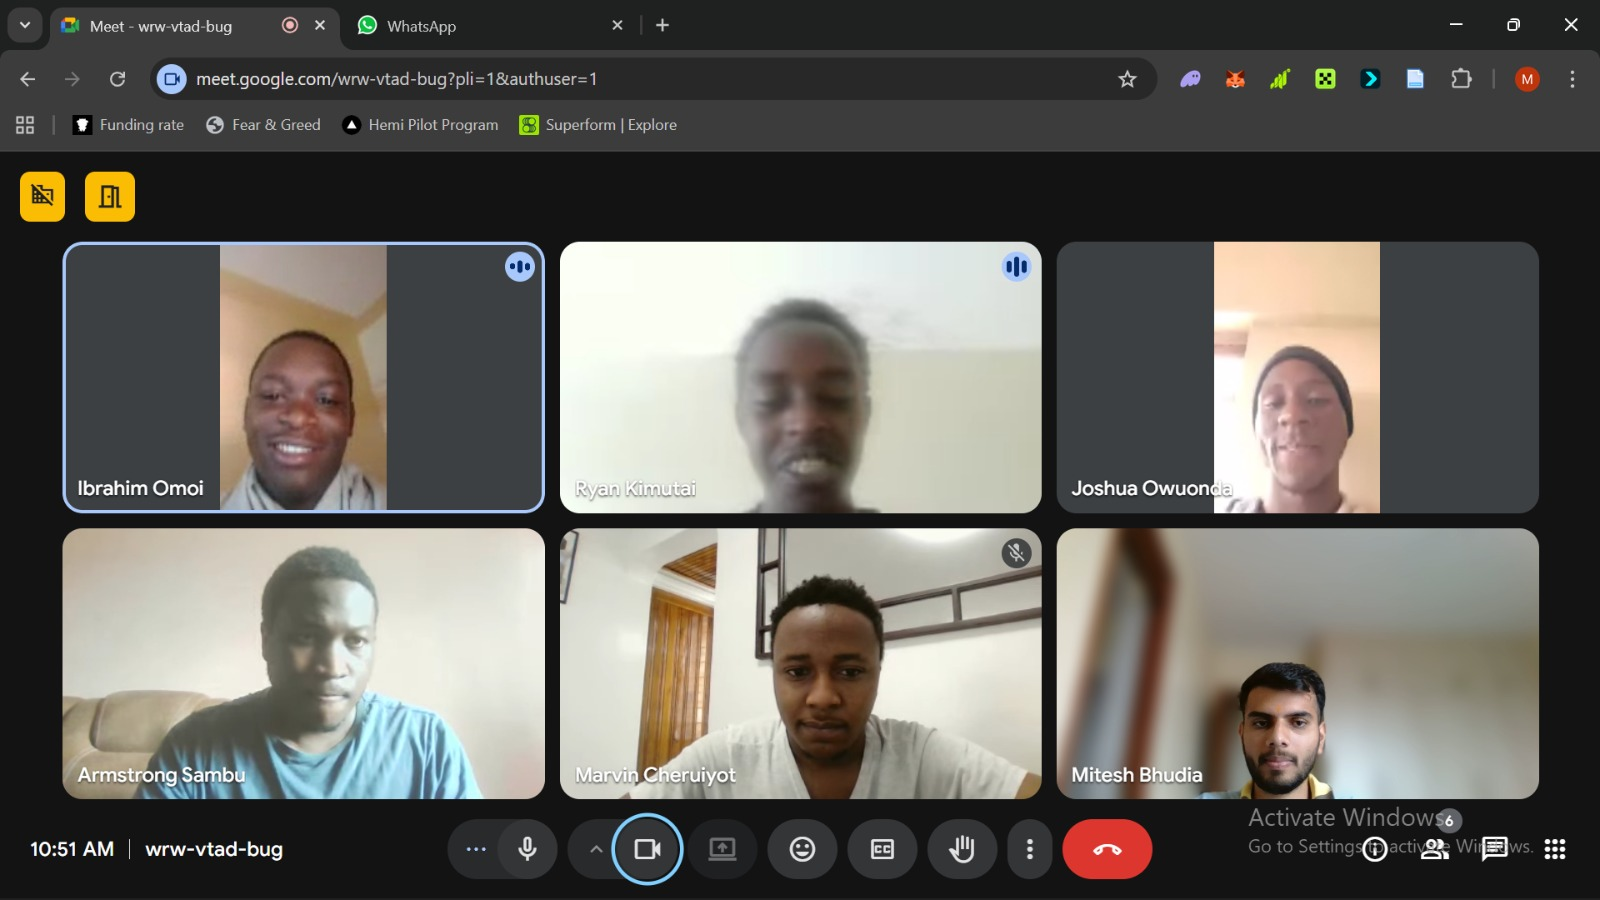